In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import utils
import model
import matplotlib.animation as animation

In [2]:
training_loss = np.load('/Users/reza/Career/DMLab/SURROGATE/sun-sim/src/week_3/navier_stokes_pinn/output/2024-08-03 17:51:46/training_losses.npy')

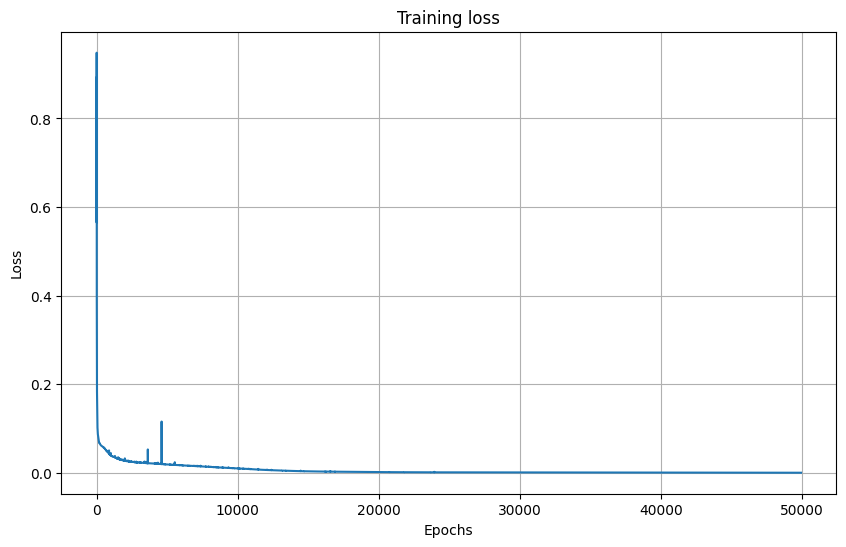

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')
plt.grid(True)
plt.savefig('curve.svg')
plt.show()

In [4]:
x_train, y_train, t_train, u_train, v_train, x_test, y_test, t_test, u_test, v_test, p_test = utils.get_data(
        '/Users/reza/Career/DMLab/SURROGATE/sun-sim/src/week_3/navier_stokes_pinn/data/cylinder_nektar_wake.mat', 5000)

pinn = model.NavierStokes(
        x_train, y_train, t_train, u_train, v_train, torch.device('cpu'))

In [5]:
pinn.net.load_state_dict(torch.load(
    '/Users/reza/Career/DMLab/SURROGATE/sun-sim/src/week_3/navier_stokes_pinn/output/2024-08-03 17:51:46/model.pt', map_location=torch.device('cpu')))


<All keys matched successfully>

P

/var/folders/bv/7h0f0hns2y72yqgg3ww8qkkm0000gn/T/ipykernel_3388/1518164896.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_test, dtype=torch.float32, requires_grad=True)
/var/folders/bv/7h0f0hns2y72yqgg3ww8qkkm0000gn/T/ipykernel_3388/1518164896.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32, requires_grad=True)
/var/folders/bv/7h0f0hns2y72yqgg3ww8qkkm0000gn/T/ipykernel_3388/1518164896.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_test = torch.tensor

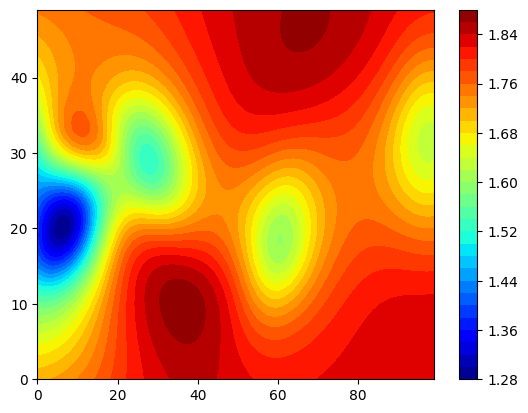

In [15]:
pinn.net.eval()

x_test = torch.tensor(x_test, dtype=torch.float32, requires_grad=True)
y_test = torch.tensor(y_test, dtype=torch.float32, requires_grad=True)
t_test = torch.tensor(t_test, dtype=torch.float32, requires_grad=True)

u_out, v_out, p_out, f_out, g_out = pinn.function(x_test, y_test, t_test)

u_plot = p_out.data.cpu().numpy()
u_plot = np.reshape(u_plot, (50, 100))

fig, ax = plt.subplots()

plt.contourf(u_plot, levels=30, cmap='jet')
plt.colorbar()

In [16]:
def animate_1(i):
    ax.clear()
    u_out, v_out, p_out, f_out, g_out = pinn.function(x_test, y_test, i*t_test)
    u_plot = p_out.data.cpu().numpy()
    # u_plot = p_test
    u_plot = np.reshape(u_plot, (50, 100))
    cax = ax.contourf(u_plot, levels=20, cmap='jet')
    # plt.colorbar()
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title(r'$p(x,\; y, \; t)$ Ground Truth')

# Call animate method
ani = animation.FuncAnimation(fig, animate_1, 20, interval=1, blit=False)
ani.save('pressure_pred.gif', fps=3)
# ani.save('pressure_gt.gif')
plt.close()
# Display the plot
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


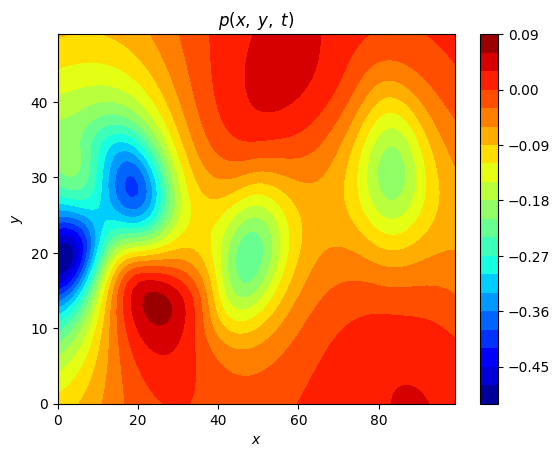

In [17]:
u_plot = p_test
u_plot = np.reshape(u_plot, (50, 100))

fig, ax = plt.subplots()

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$p(x,\; y, \; t)$')
plt.contourf(u_plot, levels=20, cmap='jet')
plt.colorbar()

In [18]:
def animate_2(i):
    ax.clear()
    u_plot = P_star[:, i*10]
    u_plot = np.reshape(u_plot, (50, 100))
    cax = ax.contourf(u_plot, levels=20, cmap='jet')
    # plt.colorbar()
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title(r'$p(x,\; y, \; t)$ Prediction')

# Call animate method
ani = animation.FuncAnimation(fig, animate_2, 20, interval=1, blit=False)
ani.save('pressure_gt.gif', fps=3)
plt.close()
# Display the plot
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


U

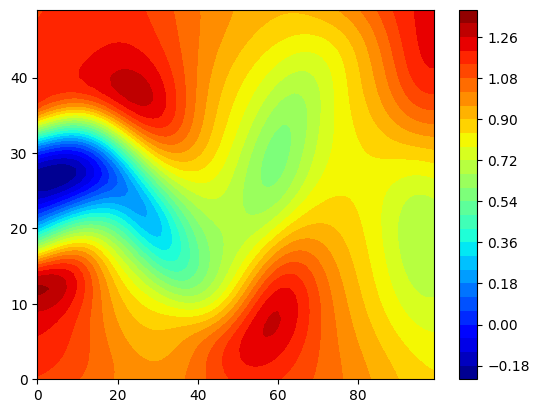

In [19]:
u_out, v_out, p_out, f_out, g_out = pinn.function(x_test, y_test, t_test)

u_plot = u_out.data.cpu().numpy()
u_plot = np.reshape(u_plot, (50, 100))

fig, ax = plt.subplots()

plt.contourf(u_plot, levels=30, cmap='jet')
plt.colorbar()

In [20]:
def animate_1(i):
    ax.clear()
    u_out, v_out, p_out, f_out, g_out = pinn.function(x_test, y_test, i*t_test)
    u_plot = u_out.data.cpu().numpy()
    # u_plot = p_test
    u_plot = np.reshape(u_plot, (50, 100))
    cax = ax.contourf(u_plot, levels=20, cmap='jet')
    # plt.colorbar()
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title(r'$u(x,\; y, \; t)$ Ground Truth')

# Call animate method
ani = animation.FuncAnimation(fig, animate_1, 20, interval=1, blit=False)
ani.save('u_pred.gif', fps=3)
# ani.save('pressure_gt.gif')
plt.close()
# Display the plot
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


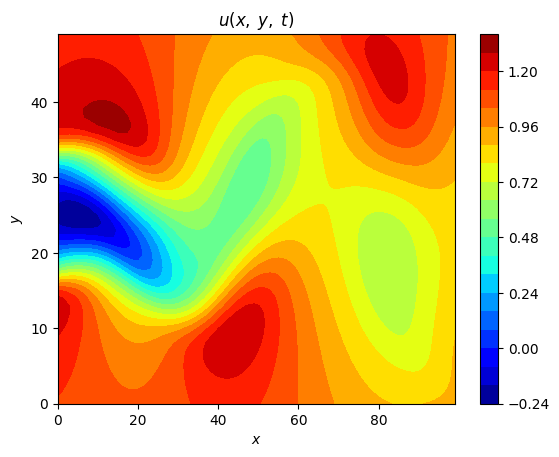

In [21]:
u_plot = u_test
u_plot = np.reshape(u_plot, (50, 100))

fig, ax = plt.subplots()

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$u(x,\; y, \; t)$')
plt.contourf(u_plot, levels=20, cmap='jet')
plt.colorbar()

In [22]:
def animate_2(i):
    ax.clear()
    u_plot = UU[:, i*10]
    u_plot = np.reshape(u_plot, (50, 100))
    cax = ax.contourf(u_plot, levels=20, cmap='jet')
    # plt.colorbar()
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title(r'$u(x,\; y, \; t)$ Prediction')

# Call animate method
ani = animation.FuncAnimation(fig, animate_2, 20, interval=1, blit=False)
ani.save('u_gt.gif', fps=3)
plt.close()
# Display the plot
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


V

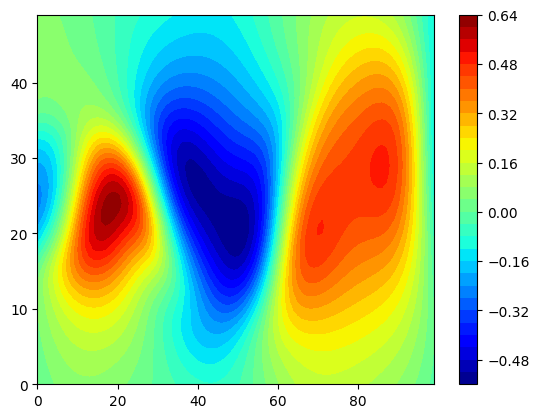

In [23]:
u_out, v_out, p_out, f_out, g_out = pinn.function(x_test, y_test, t_test)

u_plot = v_out.data.cpu().numpy()
u_plot = np.reshape(u_plot, (50, 100))

fig, ax = plt.subplots()

plt.contourf(u_plot, levels=30, cmap='jet')
plt.colorbar()

In [24]:
def animate_1(i):
    ax.clear()
    u_out, v_out, p_out, f_out, g_out = pinn.function(x_test, y_test, i*t_test)
    u_plot = v_out.data.cpu().numpy()
    # u_plot = p_test
    u_plot = np.reshape(u_plot, (50, 100))
    cax = ax.contourf(u_plot, levels=20, cmap='jet')
    # plt.colorbar()
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title(r'$v(x,\; y, \; t)$ Ground Truth')

# Call animate method
ani = animation.FuncAnimation(fig, animate_1, 20, interval=1, blit=False)
ani.save('v_pred.gif', fps=3)
# ani.save('pressure_gt.gif')
plt.close()
# Display the plot
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


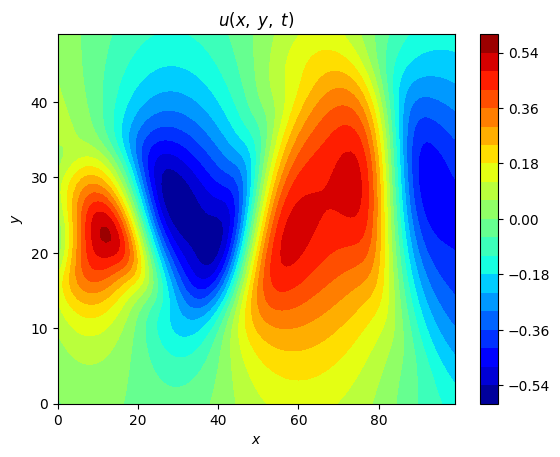

In [25]:
u_plot = v_test
u_plot = np.reshape(u_plot, (50, 100))

fig, ax = plt.subplots()

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$u(x,\; y, \; t)$')
plt.contourf(u_plot, levels=20, cmap='jet')
plt.colorbar()

In [26]:
def animate_2(i):
    ax.clear()
    u_plot = VV[:, i*10]
    u_plot = np.reshape(u_plot, (50, 100))
    cax = ax.contourf(u_plot, levels=20, cmap='jet')
    # plt.colorbar()
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title(r'$v(x,\; y, \; t)$ Prediction')

# Call animate method
ani = animation.FuncAnimation(fig, animate_2, 20, interval=1, blit=False)
ani.save('v_gt.gif', fps=3)
plt.close()
# Display the plot
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


# Data

In [10]:
from scipy.io import loadmat

In [11]:
data = loadmat('/Users/reza/Career/DMLab/SURROGATE/sun-sim/src/week_3/navier_stokes_pinn/data/cylinder_nektar_wake.mat')

In [12]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Sep 22 23:02:15 2017',
 '__version__': '1.0',
 '__globals__': [],
 'X_star': array([[ 1.        , -2.        ],
        [ 1.07070707, -2.        ],
        [ 1.14141414, -2.        ],
        ...,
        [ 7.85858586,  2.        ],
        [ 7.92929293,  2.        ],
        [ 8.        ,  2.        ]]),
 't': array([[ 0. ],
        [ 0.1],
        [ 0.2],
        [ 0.3],
        [ 0.4],
        [ 0.5],
        [ 0.6],
        [ 0.7],
        [ 0.8],
        [ 0.9],
        [ 1. ],
        [ 1.1],
        [ 1.2],
        [ 1.3],
        [ 1.4],
        [ 1.5],
        [ 1.6],
        [ 1.7],
        [ 1.8],
        [ 1.9],
        [ 2. ],
        [ 2.1],
        [ 2.2],
        [ 2.3],
        [ 2.4],
        [ 2.5],
        [ 2.6],
        [ 2.7],
        [ 2.8],
        [ 2.9],
        [ 3. ],
        [ 3.1],
        [ 3.2],
        [ 3.3],
        [ 3.4],
        [ 3.5],
        [ 3.6],
        [ 3.7],
        [ 

In [13]:
data['t'].shape

(200, 1)

In [14]:
U_star = data['U_star']  # N x 2 x T
P_star = data['p_star']  # N x T
t_star = data['t']  # T x 1
X_star = data['X_star']  # N x 2

N = X_star.shape[0]
T = t_star.shape[0]

XX = np.tile(X_star[:, 0:1], (1, T))  # N x T
YY = np.tile(X_star[:, 1:2], (1, T))  # N x T
TT = np.tile(t_star, (1, N)).T  # N x T

UU = U_star[:, 0, :]  # N x T
VV = U_star[:, 1, :]  # N x T
PP = P_star  # N x T

snap = np.array([100])
x_star = X_star[:,0:1]
y_star = X_star[:,1:2]
t_star = TT[:,snap]
u_star = U_star[:,0,snap]
v_star = U_star[:,1,snap]
p_star = P_star[:,snap]

In [99]:
P_star.shape

(5000, 200)